# **Asteroid Dataset for Regression**

## Import modules

In [ ]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

## Mounting drive in colab for accessing asteroid dataset from drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Reading dataset in pandas

In [ ]:
DATASET_PATH = "gdrive/MyDrive/Colab Notebooks/ML Practical/Project/asteroid_dataset.csv"

asteroid_df = pd.read_csv(DATASET_PATH)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



# **Descriptive Statistics**

## Column Definitions
* SPK-ID: Object primary SPK-ID
* Object ID: Object internal database ID
* Object fullname: Object full name/designation
* pdes: Object primary designation
* name: Object IAU name
* NEO: Near-Earth Object (NEO) flag
* PHA: Potentially Hazardous Asteroid (PHA) flag
* H: Absolute magnitude parameter
* Diameter: object diameter (from equivalent sphere) km Unit
* Albedo: Geometric albedo
* Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
* Orbit_id: Orbit solution ID
* Epoch: Epoch of osculation in modified Julian day form
* Equinox: Equinox of reference frame
* e: Eccentricity
* a: Semi-major axis au Unit
* q: perihelion distance au Unit
* i: inclination; angle with respect to x-y ecliptic plane
* tp: Time of perihelion passage TDB Unit
* moid_ld: Earth Minimum Orbit Intersection Distance au Unit



In [ ]:
asteroid_df

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,NaN,NaN,JPL 5,2437203.5,37203,19600926.0,J2000,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,NaN,NaN,8,2459000.5,59000,20200531.0,J2000,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,NaN,NaN,17,2459000.5,59000,20200531.0,J2000,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,NaN,NaN,JPL 3,2441956.5,41956,19731001.0,J2000,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.3

In [ ]:
asteroid_df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(asteroid_df.sample(500))

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
518382,a0518383,2518383,518383 (2017 FZ160),518383,NaN,NaN,N,N,16.5000,NaN,NaN,NaN,5,2459000.5,59000,20200531.0,J2000,0.109490,3.096347,2.757327,2.135039,21.800023,172.949431,214.466058,3.435368,0.180896,2.459805e+06,2.022081e+07,1990.091154,5.448573,1.756260,683.483704,8.083100e-08,5.519500e-08,2.524200e-07,0.000009,0.000198,2.018000e-04,3.856000e-05,6.123900e-08,4.837000e-09,2.251000e-04,5.321300e-05,MBA,0.649990
169406,a0169407,2169407,169407 (2001 XC50),169407,NaN,NaN,N,N,15.4000,NaN,NaN,NaN,JPL 15,2459000.5,59000,20200531.0,J2000,0.149049,3.088666,2.628302,1.813178,246.590895,119.431343,189.590299,3.549029,0.181572,2.459939e+06,2.022123e+07,1982.689882,5.428309,1.627370,633.323583,6.404800e-08,2.503500e-08,1.955000e-07,0.000005,0.000197,1.976400e-04,1.763900e-05,2.876600e-08,2.207500e-09,1.033400e-04,2.410500e-05,MBA,0.544790
137118,a0137119,2137119,137119 (1999 BU6),137119,NaN,NaN,N,N,14.9000,NaN,NaN,NaN,JPL 21,2459000.5,59000,20200531.0,J2000,0.279910,2.660140,1.915540,16.373112,10.108029,136.110336,345.015994,3.404739,0.227168,2.459066e+06,2.020080e+07,1584.729304,4.338752,0.956473,372.230597,4.991300e-08,1.456300e-08,1.383800e-07,0.000005,0.000014,1.649200e-05,8.049800e-06,1.864000e-08,1.865500e-09,3.568300e-05,1.301400e-05,MBA,0.507070
481426,a0481427,2481427,481427 (2006 UG142),481427,NaN,NaN,N,N,18.6000,NaN,NaN,NaN,JPL 11,2459000.5,59000,20200531.0,J2000,0.156844,2.189198,1.845836,3.371472,339.507163,73.152099,62.505761,2.532559,0.304282,2.458795e+06,2.019111e+07,1183.111999,3.239184,0.860081,334.717723,9.669600e-08,9.243500e-09,2.092500e-07,0.000005,0.000134,1.470100e-04,4.171900e-05,1.069300e-08,1.927200e-09,1.375600e-04,7.493200e-06,MBA,0.505870
209929,a0209930,2209930,209930 (2006 BQ),209930,NaN,NaN,N,N,16.7000,NaN,NaN,NaN,15,2459000.5,59000,20200531.0,J2000,0.088711,1.935916,1.764179,19.407183,346.976061,206.703951,47.429028,2.107652,0.365910,2.458871e+06,2.020012e+07,983.848226,2.693630,0.778528,302.979742,7.725600e-08,1.138700e-08,1.504600e-07,0.000008,0.000012,3.257600e-05,2.986100e-05,1.239700e-08,3.228400e-09,8.161100e-05,8.680500e-06,IMB,0.640780
421487,a0421488,2421488,421488 (2014 OE59),421488,NaN,NaN,N,N,17.4000,NaN,NaN,NaN,12,2459000.5,59000,20200531.0,J2000,0.075171,2.781668,2.572568,3.201973,31.672955,306.471013,69.489374,2.990769,0.212445,2.458673e+06,2.019071e+07,1694.557913,4.639447,1.565080,609.082184,9.409100e-08,4.202600e-08,2.513200e-07,0.000007,0.000160,1.707400e-04,5.340200e-05,4.518500e-08,4.814400e-09,2.517100e-04,3.840200e-05,MBA,0.572020
4482,a0004483,2004483,4483 Petofi (1986 RC2),4483,Petofi,NaN,N,N,13.3000,5.850,0.193,0.047,JPL 29,2459000.5,59000,20200531.0,J2000,0.083792,1.922414,1.761331,26.724565,184.177334,186.319790,209.693738,2.083498,0.369772,2.459407e+06,2.021071e+07,973.573829,2.665500,0.760472,295.952888,4.904200e-08,4.701000e-09,9.464000e-08,0.000006,0.000007,2.130200e-05,2.096800e-05,5.094900e-09,1.356300e-09,5.698900e-05,3.571100e-06,IMB,0.379030
476370,a0476371,2476371,476371 (2008 CY33),476371,NaN,NaN,N,N,17.1000,NaN,NaN,NaN,11,2459000.5,59000,20200531.0,J2000,0.083469,3.005223,2.754381,3.485884,117.096968,343.680840,174.694022,3.256065,0.189186,2.458077e+06,2.017112e+07,1902.889369,5.209827,1.771490,689.410763,8.690300e-08,5.045300e-08,2.529400e-07,0.000009,0.000145,1.570400e-04,5.658800e-05,5.466500e-08,4.764200e-09,2.975300e-04,4.792000e-05,MBA,0.708390
300333,a0300334,2300334,300334 Antonalexander (2007 RF18),300334,Antonalexander,NaN,N,N,16.2000,NaN,NaN,NaN,14,2459000.5,59000,20200531.0,J2000,0.240617,2.420717,1.838252,8.240847,277.447204,8.188433,169.587290,3.003182,0.261691,2.458352e+06,2.018082e+07,1375.670555,3.766381,0.822224,319.984914,5.297100e-08,2.190900e-08,1.345400e-07,0.000006,

In [ ]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

We have 45 features in total.
*   35 are numeric in nature.
*   10 are categorical in nature.

There are some columns having missing values. We would be dealing with them in the data cleaning phase.



In [ ]:
asteroid_df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


### Missing Values
* diameter
* albedo
* diameter_sigma 

are the 3 numeric features having alot of missing values.

### Outliers
* diameter
* diameter_sigma
* a
* i
* ad
* per
* moid_ld
* sigma columns

have outliers which we can see by their summary statistics.

In [ ]:
asteroid_df.describe(include=[object])

,id,full_name,pdes,name,prefix,neo,pha,orbit_id,equinox,class
count,958524,958524,958524,22064,18,958520,938603,958524,958524,958524
unique,958524,958524,958524,22064,1,2,2,4690,1,13
top,bK16UA6L,(2015 VV183),2014 WV397,Oschin,A,N,N,1,J2000,MBA
freq,1,1,1,1,18,935625,936537,50142,958524,855954


### Missing Values:
* name
* prefix

columns have many missing values.

### Column with unique values:
* id
* full_name
* pdes
* name

every value of these columns is unique.

### Column with same value in all rows:
* equinox

In [ ]:
asteroid_df['pha'].value_counts(normalize=True)*100

N    99.779886
Y     0.220114
Name: pha, dtype: float64

In our data only 0.22% asteroids are Potentially Hazardous Asteroid. Other 99.78% asteroids are not potentially hazardous. 

In [ ]:
asteroid_df['neo'].value_counts(normalize=True)*100

N    97.611422
Y     2.388578
Name: neo, dtype: float64

According to our data only 2.39% asteroids are Near-Earth Object (NEO). Other 97.61% asteroids are not near-earth.

In [ ]:
asteroid_df['class'].value_counts(normalize=True)*100

MBA    89.299172
OMB     2.958194
IMB     2.124099
MCA     1.949351
APO     1.323598
AMO     0.882294
TJN     0.857673
TNO     0.361806
ATE     0.180382
CEN     0.052789
AST     0.007929
IEO     0.002295
HYA     0.000417
Name: class, dtype: float64

In the data we are provided asteroids are divided into 13 classes with 89.3% asteroids in MBA class which is most common class in our data.



In [ ]:
asteroid_df['orbit_id'].value_counts(normalize=True)

1            0.052312
JPL 1        0.049549
JPL 2        0.036064
JPL 3        0.031226
12           0.030397
               ...   
MPO487043    0.000001
MPO478798    0.000001
MPO486208    0.000001
MPO486559    0.000001
MPO492076    0.000001
Name: orbit_id, Length: 4690, dtype: float64

## Conclusion:



*   There are 45 features in our dataset.
*   Out of total 45 features 35 are numeric while other 10 are categorical in nature.
*   Some columns have missing values. Diameter, diameter_sigma, albedo, name and prefix are the notable features with alot of missing values.
*   By summary statistics we can clearly see that there are outliers in our data which we would be taking care of in data cleaning stage.
*   Id, pdes, full_name and name are the categorical features with all values unique. We would be removing them in later stage as they would not be any helpful in making prediction. Full_name does not have any missing value and could be of use so we would not be removing it right now.
*   Equinox is a features having same value for every row so we would remove it. It is an unwanted feature.
*   In our data only 0.22% asteroids are Potentially Hazardous Asteroid. Other 99.78% asteroids are not potentially hazardous. 
*   According to our data only 2.39% asteroids are Near-Earth Object (NEO). Other 97.61% asteroids are not near-earth.
* In the data we are provided asteroids are divided into 13 classes with 89.3% asteroids in MBA class which is most common class in our data.




# **Data Cleaning**

## Remove Unwanted Observations

We are removing id, pdes, prefix, name and equinox as they are unwanted observations and they would not be any help in prediction.

In [ ]:
asteroid_df = asteroid_df.drop(['id', 'pdes', 'name', 'prefix', 'equinox'], axis='columns')

In [ ]:
asteroid_df

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001,1 Ceres,N,N,3.400,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,2000002,2 Pallas,N,N,4.200,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,2000003,3 Juno,N,N,5.330,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,2000004,4 Vesta,N,N,3.000,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,2000005,5 Astraea,N,N,6.900,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,3246801,(6013 P-L),N,N,17.135,NaN,NaN,NaN,JPL 5,2437203.5,37203,19600926.0,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,3246834,(6331 P-L),N,N,18.500,NaN,NaN,NaN,8,2459000.5,59000,20200531.0,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,3013075,(6344 P-L),Y,Y,20.400,NaN,NaN,NaN,17,2459000.5,59000,20200531.0,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,3246457,(2060 T-2),N,N,18.071,NaN,NaN,NaN,JPL 3,2441956.5,41956,19731001.0,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,0.893896,347.877506,3.169800e-02,5.966200e-01,5.478400e-01,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


## Fix Structural Errors

Converting Categorical Data which is in Object Format to Category. 
The category data type in pandas is a hybrid data type. It looks and behaves like a string in many instances but internally is represented by an array of integers. This allows the data to be sorted in a custom order and to more efficiently store the data.

In [ ]:
orbits = asteroid_df['orbit_id'].value_counts().loc[lambda x: x < 10].index.to_list()
asteroid_df.loc[asteroid_df['orbit_id'].isin(orbits), 'orbit_id'] = 'other'

In [ ]:
asteroid_df['neo'] = asteroid_df['neo'].astype('category')
asteroid_df['pha'] = asteroid_df['pha'].astype('category')
asteroid_df['orbit_id'] = asteroid_df['orbit_id'].astype('category')
asteroid_df['full_name'] = asteroid_df['full_name'].astype('category')
asteroid_df['class'] = asteroid_df['class'].astype('category')

## Filter out Missing Data

Removing all rows having no value for diameter as we are going to do predict diameter using regression. Filling diameter in anyway would not be any fruitful for us

In [ ]:
asteroid_df = asteroid_df[asteroid_df['diameter'].notna()]

In [ ]:
asteroid_df = asteroid_df[asteroid_df['H'].notna()]

In [ ]:
asteroid_df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,1.320450e+05,132045.000000,132045.000000,131237.000000,131917.000000,1.320450e+05,132045.000000,1.320450e+05,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,1.320450e+05,1.320450e+05,1.320450e+05,132045.000000,132045.000000,132045.000000,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,132045.000000
mean,2.215907e+06,15.132319,5.602707,0.132392,0.478304,2.458994e+06,58993.475974,2.020035e+07,0.146022,2.828163,2.413071,10.093773,169.480432,181.827464,184.583385,3.243254,0.217983,2.459013e+06,2.020012e+07,1.796761e+03,4.919262,1.430350,556.649228,2.438459e-03,1.062268e-02,7.523637e-03,7.776259e-03,6.732279e-02,1.127262e+00,1.067749e+00,1.290154e-02,1.343465e-03,4.019431e+00,9.985943e+00,0.543931
std,5.454489e+05,1.387944,9.555706,0.111310,0.793604,1.543842e+02,154.384216,4.209854e+03,0.077315,1.517037,0.520002,6.690898,102.655494,103.490928,105.508301,2.881899,0.056655,5.383741e+02,1.501109e+04,9.105748e+03,24.930180,0.516226,200.899547,1.957794e-01,7.560616e-01,7.238611e-01,5.008000e-01,4.112785e+00,1.103876e+02,1.078398e+02,9.520585e-01,1.038448e-01,3.970059e+02,7.077105e+02,0.060944
min,2.000001e+06,3.000000,0.002500,0.001000,0.000500,2.452464e+06,52464.000000,2.002071e+07,0.000310,0.626210,0.081820,0.022056,0.000418,0.000130,0.006018,0.999954,0.000135,2.425254e+06,1.928011e+07,1.809999e+02,0.495551,0.000027,0.010335,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.077673
25%,2.047374e+06,14.400000,2.848000,0.053000,0.177000,2.459000e+06,59000.000000,2.020053e+07,0.090390,2.551975,2.078589,4.993338,82.136991,91.921581,91.978517,2.884749,0.180757,2.458612e+06,2.019051e+07,1.489063e+03,4.076833,1.091880,424.926940,4.013200e-08,1.318600e-08,1.089500e-07,4.562100e-06,2.252600e-05,3.448100e-05,1.640700e-05,1.515400e-08,1.720100e-09,7.229500e-05,1.164300e-05,0.510210
50%,2.123336e+06,15.200000,4.051000,0.079000,0.327000,2.459000e+06,59000.000000,2.020053e+07,0.139488,2.761077,2.377512,9.157001,160.158826,183.492148,188.565756,3.182549,0.214826,2.459032e+06,2.020070e+07,1.675777e+03,4.588027,1.397470,543.853400,4.935400e-08,2.051900e-08,1.411100e-07,5.608900e-06,3.443200e-05,5.097600e-05,2.431900e-05,2.336400e-08,2.257100e-09,1.153900e-04,1.897500e-05,0.544400
75%,2.248146e+06,16.000000,5.847000,0.195000,0.619000,2.459000e+06,59000.000000,2.020053e+07,0.191478,3.097934,2.694175,13.438284,255.032120,271.618260,277.599056,3.477341,0.241763,2.459420e+06,2.021072e+07,1.991621e+03,5.452760,1.708160,664.764627,6.502300e-08,3.309200e-08,1.936600e-07,7.306800e-06,6.081800e-05,8.382600e-05,4.079800e-05,3.749700e-08,3.267700e-09,2.064200e-04,3.138700e-05,0.578580
max,5.400002e+07,29.900000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,0.983789,376.133297,40.318477,170.334595,359.999793,359.998075,359.999226,746.169105,1.988951,2.465757e+06,2.038113e+07,2.664472e+06,7294.925719,39.360300,15317.847951,4.989300e+01,1.797900e+02,2.243800e+02,1.404900e+02,8.025000e+02,3.468400e+04,3.451200e+04,2.188700e+02,3.274700e+01,1.164500e+05,1.501300e+05,7.725100


## Fill in Missing Data

Some values are still missing in our dataset. We can either remove the rows with missing values or fill in some approperiate value. In our case filling missing values would be approperiate.

In [ ]:
asteroid_df['albedo'].fillna((asteroid_df['albedo'].mean()), inplace=True)
asteroid_df['diameter_sigma'].fillna((asteroid_df['diameter_sigma'].mean()), inplace=True)

In [ ]:
asteroid_df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,1.320450e+05,132045.000000,132045.000000,132045.000000,132045.000000,1.320450e+05,132045.000000,1.320450e+05,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,132045.000000,1.320450e+05,1.320450e+05,1.320450e+05,132045.000000,132045.000000,132045.000000,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,1.320450e+05,132045.000000
mean,2.215907e+06,15.132319,5.602707,0.132392,0.478304,2.458994e+06,58993.475974,2.020035e+07,0.146022,2.828163,2.413071,10.093773,169.480432,181.827464,184.583385,3.243254,0.217983,2.459013e+06,2.020012e+07,1.796761e+03,4.919262,1.430350,556.649228,2.438459e-03,1.062268e-02,7.523637e-03,7.776259e-03,6.732279e-02,1.127262e+00,1.067749e+00,1.290154e-02,1.343465e-03,4.019431e+00,9.985943e+00,0.543931
std,5.454489e+05,1.387944,9.555706,0.110969,0.793219,1.543842e+02,154.384216,4.209854e+03,0.077315,1.517037,0.520002,6.690898,102.655494,103.490928,105.508301,2.881899,0.056655,5.383741e+02,1.501109e+04,9.105748e+03,24.930180,0.516226,200.899547,1.957794e-01,7.560616e-01,7.238611e-01,5.008000e-01,4.112785e+00,1.103876e+02,1.078398e+02,9.520585e-01,1.038448e-01,3.970059e+02,7.077105e+02,0.060944
min,2.000001e+06,3.000000,0.002500,0.001000,0.000500,2.452464e+06,52464.000000,2.002071e+07,0.000310,0.626210,0.081820,0.022056,0.000418,0.000130,0.006018,0.999954,0.000135,2.425254e+06,1.928011e+07,1.809999e+02,0.495551,0.000027,0.010335,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.077673
25%,2.047374e+06,14.400000,2.848000,0.054000,0.177000,2.459000e+06,59000.000000,2.020053e+07,0.090390,2.551975,2.078589,4.993338,82.136991,91.921581,91.978517,2.884749,0.180757,2.458612e+06,2.019051e+07,1.489063e+03,4.076833,1.091880,424.926940,4.013200e-08,1.318600e-08,1.089500e-07,4.562100e-06,2.252600e-05,3.448100e-05,1.640700e-05,1.515400e-08,1.720100e-09,7.229500e-05,1.164300e-05,0.510210
50%,2.123336e+06,15.200000,4.051000,0.080000,0.327000,2.459000e+06,59000.000000,2.020053e+07,0.139488,2.761077,2.377512,9.157001,160.158826,183.492148,188.565756,3.182549,0.214826,2.459032e+06,2.020070e+07,1.675777e+03,4.588027,1.397470,543.853400,4.935400e-08,2.051900e-08,1.411100e-07,5.608900e-06,3.443200e-05,5.097600e-05,2.431900e-05,2.336400e-08,2.257100e-09,1.153900e-04,1.897500e-05,0.544400
75%,2.248146e+06,16.000000,5.847000,0.193000,0.618000,2.459000e+06,59000.000000,2.020053e+07,0.191478,3.097934,2.694175,13.438284,255.032120,271.618260,277.599056,3.477341,0.241763,2.459420e+06,2.021072e+07,1.991621e+03,5.452760,1.708160,664.764627,6.502300e-08,3.309200e-08,1.936600e-07,7.306800e-06,6.081800e-05,8.382600e-05,4.079800e-05,3.749700e-08,3.267700e-09,2.064200e-04,3.138700e-05,0.578580
max,5.400002e+07,29.900000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,0.983789,376.133297,40.318477,170.334595,359.999793,359.998075,359.999226,746.169105,1.988951,2.465757e+06,2.038113e+07,2.664472e+06,7294.925719,39.360300,15317.847951,4.989300e+01,1.797900e+02,2.243800e+02,1.404900e+02,8.025000e+02,3.468400e+04,3.451200e+04,2.188700e+02,3.274700e+01,1.164500e+05,1.501300e+05,7.725100


# **Data Transformation**

## Remove Duplicates

There are no duplicates in our data

In [ ]:
duplicated = asteroid_df[asteroid_df.duplicated()]

In [ ]:
duplicated

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms


## Renaming Axis

In [ ]:
asteroid_df = asteroid_df.reset_index(drop=True)

In [ ]:
asteroid_df.sample(5)

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
116281,2388252,388252 (2006 MQ1),N,N,16.8,2.235,0.043,0.326,12,2459000.5,59000,20200531.0,0.132599,2.576151,2.234557,12.848877,115.631649,58.351973,188.002269,2.917745,0.238367,2.459722e+06,2.022052e+07,1510.273129,4.134902,1.270790,494.553344,1.039500e-07,2.854700e-08,2.771500e-07,0.000008,0.000029,0.000040,0.000025,3.233200e-08,3.962100e-09,0.000112,0.000025,MBA,0.48537
29029,2040144,40144 (1998 QC71),N,N,14.3,9.375,0.032,0.220,JPL 28,2459000.5,59000,20200531.0,0.285132,2.850552,2.037768,7.237400,236.570567,113.649587,177.985796,3.663336,0.204791,2.458131e+06,2.018011e+07,1757.891106,4.812844,1.045330,406.811076,5.481200e-08,2.075300e-08,1.529300e-07,0.000005,0.000041,0.000043,0.000021,2.667000e-08,2.236400e-09,0.000094,0.000019,MBA,0.58573
82888,2191384,191384 (2003 SZ27),N,N,15.2,5.760,0.037,0.417,19,2459000.5,59000,20200531.0,0.076781,2.966878,2.739078,4.060778,227.222161,82.207829,145.072185,3.194678,0.192865,2.458248e+06,2.018051e+07,1866.585792,5.110433,1.728360,672.625861,4.588800e-08,2.399900e-08,1.348500e-07,0.000005,0.000072,0.000079,0.000034,2.584200e-08,2.340200e-09,0.000175,0.000023,MBA,0.53987
72686,2144783,144783 (2004 HO30),N,N,15.0,3.741,0.152,0.237,JPL 20,2459000.5,59000,20200531.0,0.169782,3.062263,2.542347,10.621896,214.199633,78.102200,303.735135,3.582179,0.183925,2.459306e+06,2.021040e+07,1957.321547,5.358854,1.553350,604.517220,3.666600e-08,2.416400e-08,1.232700e-07,0.000006,0.000020,0.000027,0.000018,2.826700e-08,2.177000e-09,0.000102,0.000023,MBA,0.54667
22640,2030043,30043 Lisamichaels (2000 EJ17),N,N,15.9,3.447,0.078,1.361,18,2459000.5,59000,20200531.0,0.173132,2.401228,1.985499,1.833695,266.726069,340.356590,101.510173,2.816958,0.264883,2.458617e+06,2.019051e+07,1359.091043,3.720988,0.971953,378.254949,3.809600e-08,1.111500e-08,9.134900e-08,0.000004,0.000178,0.000179,0.000018,1.303900e-08,1.839200e-09,0.000067,0.000009,MBA,0.58394


## Seperating Categorical and Numeric Features

In [ ]:
categorical_columns = ['full_name', 'neo', 'pha', 'orbit_id', 'class']

numeric_df = asteroid_df[asteroid_df.columns[~asteroid_df.columns.isin(categorical_columns)]]
categoric_df = asteroid_df[categorical_columns]

## Hot Encoding

In [ ]:
categoric_df = pd.get_dummies(categoric_df, columns=['neo', 'pha', 'class', 'orbit_id'])

In [ ]:
categoric_df

,full_name,neo_N,neo_Y,pha_N,pha_Y,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_HYA,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO,orbit_id_1,orbit_id_10,orbit_id_101,orbit_id_103,orbit_id_104,orbit_id_11,orbit_id_12,orbit_id_13,orbit_id_14,orbit_id_15,orbit_id_16,orbit_id_17,orbit_id_18,orbit_id_19,orbit_id_2,orbit_id_20,orbit_id_21,orbit_id_22,orbit_id_23,orbit_id_24,orbit_id_25,orbit_id_26,...,orbit_id_JPL 58,orbit_id_JPL 59,orbit_id_JPL 6,orbit_id_JPL 60,orbit_id_JPL 61,orbit_id_JPL 62,orbit_id_JPL 63,orbit_id_JPL 64,orbit_id_JPL 65,orbit_id_JPL 66,orbit_id_JPL 67,orbit_id_JPL 68,orbit_id_JPL 69,orbit_id_JPL 7,orbit_id_JPL 70,orbit_id_JPL 71,orbit_id_JPL 72,orbit_id_JPL 73,orbit_id_JPL 74,orbit_id_JPL 75,orbit_id_JPL 76,orbit_id_JPL 77,orbit_id_JPL 78,orbit_id_JPL 79,orbit_id_JPL 8,orbit_id_JPL 80,orbit_id_JPL 81,orbit_id_JPL 82,orbit_id_JPL 83,orbit_id_JPL 84,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 9,orbit_id_JPL 91,orbit_id_JPL 94,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99,orbit_id_other
0,1 Ceres,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2 Pallas,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3 Juno,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4 Vesta,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5 Astraea,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132040,(2016 NW24),1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132041,(2016 NR35),1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
132042,(2016 PB66),1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132043,(2016 TF119),1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Normalization( Scaling )

In [ ]:

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(numeric_df)
numeric_df = pd.DataFrame(scaled_df, columns=numeric_df.columns)

## Conclusion

In [ ]:
asteroid_df = pd.concat([categoric_df, numeric_df], axis=1)

Now our data have no missing values. Numeric Features are normalized and categorical data is hot encoded. Data is ready to be used in a machine learning model.

In [ ]:
asteroid_df.sample(10)

,full_name,neo_N,neo_Y,pha_N,pha_Y,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_HYA,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO,orbit_id_1,orbit_id_10,orbit_id_101,orbit_id_103,orbit_id_104,orbit_id_11,orbit_id_12,orbit_id_13,orbit_id_14,orbit_id_15,orbit_id_16,orbit_id_17,orbit_id_18,orbit_id_19,orbit_id_2,orbit_id_20,orbit_id_21,orbit_id_22,orbit_id_23,orbit_id_24,orbit_id_25,orbit_id_26,...,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99,orbit_id_other,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
81653,184537 (2005 QT32),1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.003549,0.490706,0.003512,0.053053,0.000704,1.0,1.0,1.0,0.258367,0.006014,0.051419,0.038071,0.443446,0.461360,0.008764,0.003514,0.101084,0.832800,0.835958,0.000604,0.000604,0.028958,0.028958,1.602754e-09,1.242042e-10,1.013907e-09,6.189758e-08,5.436176e-08,1.369414e-09,4.724496e-10,1.279933e-10,7.133183e-11,6.950723e-10,1.384173e-10,0.048365
58046,101410 (1998 VZ6),1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.001950,0.505576,0.001465,0.212212,0.001554,1.0,1.0,1.0,0.191571,0.004701,0.046186,0.013256,0.506185,0.591050,0.867179,0.002473,0.133930,0.837617,0.836513,0.000439,0.000439,0.024066,0.024066,7.518325e-10,6.639786e-11,4.121777e-10,3.012521e-08,1.399481e-07,3.260978e-09,4.811132e-10,6.484163e-11,6.095226e-11,5.427924e-10,6.737217e-11,0.066648
99185,248326 (2005 QA14),1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.004775,0.486989,0.004611,0.048048,0.001246,1.0,1.0,1.0,0.065610,0.005730,0.062531,0.025211,0.491325,0.658897,0.009163,0.002628,0.106965,0.832804,0.835958,0.000567,0.000567,0.040948,0.040948,8.066899e-10,1.262677e-10,5.296391e-10,4.226843e-08,6.994805e-08,2.109611e-09,1.313432e-09,1.104486e-10,7.968374e-11,1.828700e-09,1.380842e-10,0.056938
36943,54351 (2000 KV30),1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.001045,0.420074,0.003933,0.295295,0.000411,1.0,1.0,1.0,0.105763,0.004558,0.050008,0.028220,0.726063,0.071814,0.516162,0.002123,0.138568,0.848785,0.853856,0.000422,0.000422,0.027408,0.027408,7.158556e-10,5.366968e-11,3.690945e-10,2.813005e-08,5.788824e-08,1.476726e-09,7.038184e-10,4.868592e-11,5.214534e-11,7.740848e-10,5.383790e-11,0.054832
131191,(2014 SY339),1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0.032738,0.464684,0.004460,0.083083,0.001418,1.0,1.0,1.0,0.067254,0.006310,0.067474,0.086113,0.828905,0.127039,0.203450,0.002946,0.095506,0.823673,0.826872,0.000643,0.000643,0.045847,0.045847,1.817673e-09,2.379591e-10,1.177290e-09,4.774782e-08,3.264213e-08,1.535139e-09,1.352520e-09,2.084566e-10,1.243321e-10,2.103926e-09,2.702364e-10,0.046651
29927,41707 (2000 UU55),1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000802,0.449814,0.006316,0.071071,0.000525,1.0,1.0,1.0,0.252062,0.004609,0.042001,0.034886,0.285697,0.671414,0.531076,0.002606,0.136903,0.848488,0.853845,0.000428,0.000428,0.019649,0.019649,6.273662e-10,5.199384e-11,3.232972e-10,2.672141e-08,4.138606e-08,9.822902e-10,2.201634e-10,5.331881e-11,4.950999e-11,2.506155e-10,5.236718e-11,0.054631
74767,154364 (2002 XM62),1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.002969,0.520446,0.002826,0.042042,0.001111,1.0,1.0,1.0,0.141123,0.004567,0.048060,0.013215,0.921417,0.327096,0.857224,0.002237,0.138266,0.837800,0.836583,0.000423,0.000423,0.026252,0.026252,9.402157e-10,9.647184e-11,4.997791e-10,5.037007e-08,1.431630e-07,3.403983e-09,8.416545e-10,9.027225e-11,9.337660e-11,9.173222e-10,9.684663e-11,0.061167
98151,247003 (1999 VJ79),1,0,1,0,0,0,0,0,0,0,0,0,1,

# **Dimensionality Reduction**

## Principle Component Analysis ( PCA )

### Choosing number of principle components

Text(0, 0.5, 'cumulative explained variance')

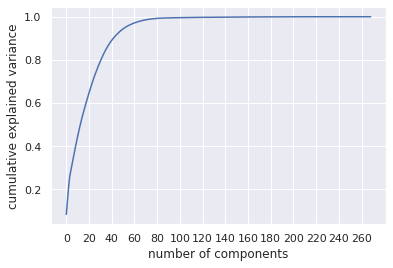

In [ ]:
X = asteroid_df.drop(['diameter', "full_name"],axis=1).values

pca = PCA().fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.xticks(np.arange(0, 271, 20))
plt.ylabel('cumulative explained variance')

By Explained Variance Graph we can see that 40 components are defining around 90% of Variance while 60 components are defining around 97% of Variance.

We originally had 271 features. Reducing dimensions from 271 to 60 with 97% Varience is a good idea. As we lost only 3% Variance and cut features to train to 60 only.

### Apply PCA 

In [ ]:
pca = PCA(n_components=60)
principal_components = pca.fit_transform(X)

In [ ]:
principal_df= pd.DataFrame(principal_components)

In [ ]:
principal_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-0.112090,0.026910,0.297159,-0.382370,-0.000232,0.003146,-0.004517,0.006140,0.016130,-0.004154,0.021529,-0.008558,0.026723,-0.019781,0.014134,-0.019268,0.016575,0.002415,0.005908,0.023142,0.000048,-0.012088,-0.006381,0.010631,0.034438,0.011809,0.006832,0.030631,-0.010327,-0.017608,-0.072536,0.040332,0.002205,0.004807,0.040291,0.015483,0.009005,0.032086,0.020335,0.003696,0.020827,-0.047325,0.045570,0.012712,0.019913,0.071276,-0.024239,0.071137,-0.041821,0.037553,-0.025481,-0.084471,0.043690,-0.019915,0.020673,0.027222,0.080913,-0.019597,-0.025762,0.017149
1,-0.097839,-0.264097,0.079488,0.252269,-0.000388,0.004849,-0.001682,0.008573,0.014264,-0.007389,0.020611,-0.008756,0.026370,-0.023637,0.017382,-0.022898,0.017420,0.002109,0.006161,0.030305,0.004528,0.003779,-0.002358,0.005510,0.033646,0.009122,0.011797,0.034808,-0.003001,-0.006076,-0.027330,0.042609,0.005610,0.005334,0.046283,0.018244,0.006795,0.036937,0.025604,0.007043,0.035031,-0.034946,0.053664,0.030986,0.012101,0.072932,0.009980,0.083115,-0.004081,0.036513,0.006406,-0.012463,0.175375,-0.010729,-0.018551,0.303720,0.802560,-0.565602,-0.111403,-0.098405
2,-0.094861,-0.146155,0.145741,0.129516,0.002145,0.008512,-0.006514,0.012560,0.017322,-0.015382,0.026503,-0.020004,0.035854,-0.018919,0.033820,-0.027338,0.034970,0.006186,0.009452,0.070003,0.067205,0.107967,0.047669,-0.014461,0.028877,-0.013034,-0.002826,0.046157,0.002644,0.025929,0.121543,0.034355,-0.010824,0.001872,0.044267,-0.003308,-0.013770,0.042387,0.002182,0.014145,0.044978,-0.006515,0.023349,0.020423,0.000100,0.054278,-0.005195,0.065339,-0.030040,0.024229,-0.022008,-0.045606,0.089053,-0.025572,-0.085392,0.016660,0.117749,-0.051178,-0.023628,0.290774
3,-0.124867,-0.081985,0.238028,-0.189517,0.006519,0.016594,-0.018833,0.022737,0.022062,-0.034987,0.035435,-0.048677,0.052824,0.001098,0.070320,-0.009997,0.073818,-0.011160,-0.004240,0.071069,0.045124,-0.013929,0.006750,0.014422,0.086598,-0.012441,-0.013410,0.091110,-0.039848,-0.030506,-0.039140,0.101142,-0.038717,0.026632,0.119548,-0.001506,-0.048517,0.120101,-0.017281,0.094872,0.190423,0.180571,-0.007238,0.157829,-0.087927,0.022933,0.306368,0.892593,-0.286661,-0.133819,-0.042763,0.033063,-0.043968,-0.018487,-0.036596,-0.024367,0.008185,-0.021724,-0.025724,0.005717
4,-0.124281,-0.448861,0.414493,0.283509,0.000349,0.008720,-0.004558,0.012812,0.020526,-0.015009,0.027883,-0.018706,0.041588,-0.023535,0.035625,-0.033308,0.036207,0.006304,0.010726,0.073350,0.070987,0.110081,0.045783,-0.015137,0.031698,-0.013833,-0.005530,0.048689,-0.001067,0.019821,0.107727,0.039617,-0.013541,0.005635,0.052468,-0.004476,-0.022959,0.050125,-0.006423,0.028290,0.063454,0.033255,0.006181,0.029988,-0.013875,0.030203,0.006058,0.051814,-0.026842,0.025179,-0.027395,-0.099554,0.046929,-0.027073,-0.096045,0.022829,0.100004,-0.048623,-0.009578,0.289346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132040,-0.078545,0.187110,-0.157986,0.132798,-0.001136,-0.002093,0.004512,-0.000117,0.008962,0.008994,0.014673,0.010999,0.008602,-0.030856,-0.013994,-0.020811,-0.014584,0.009845,0.009255,0.000138,-0.031669,-0.007753,-0.010724,0.006154,0.008375,0.024253,0.030156,0.004520,0.022263,0.014224,0.011605,0.010505,0.034483,-0.004136,0.004834,0.038335,0.035496,-0.003076,0.063583,-0.018007,-0.021748,-0.106331,0.130711,0.030661,0.074170,0.110851,0.076637,0.200368,0.872101,-0.260842,-0.192082,-0.170046,-0.149509,-0.035198,-0.008489,-0.026713,-0.018930,-0.007554,-0.001768,0.000412
132041,-0.080588,-0.039950,-0.183668,-0.067687,-0.000871,0.001058,-0.000126,0.002849,0.011183,0.003645,0.017348,0.004427,0.013596,-0.028771,-0.004464,-0.021668,-0.005147,0.009679,0.0107

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.08355571 0.06381918 0.06048373 0.0515081  0.0274323  0.02735839
 0.02730106 0.02706948 0.02631683 0.02580512 0.02482379 0.02412266
 0.02312027 0.02186707 0.02087101 0.01996718 0.0192198  0.01874096
 0.01826461 0.01771658 0.01731131 0.01708235 0.01667087 0.01650386
 0.01568104 0.01495166 0.0141959  0.01374237 0.01330197 0.01306578
 0.01250023 0.0120416  0.01156158 0.01129836 0.01034884 0.00969595
 0.00941856 0.00892393 0.0081075  0.00796201 0.00727814 0.00653529
 0.0063891  0.00595547 0.00566324 0.00554988 0.00504032 0.00477413
 0.00452997 0.00429522 0.0041318  0.00364311 0.00342264 0.00332932
 0.00299249 0.00267476 0.00255703 0.00247249 0.00232696 0.00229336]


We can see the Explained Varience by each Principal Component. Most Varience is explained by First 4 Principal Components which is 8.36%, 6.38%, 6.05% and 5.15% respectively.

## Conclusion

We have reduced Features from 271 to 60 using PCA. 60 components are explaining 97% of Variance of the 271 features.

# **Model Training**

## **Splitting the Dataset**

In [ ]:
X = principal_df.values
y = asteroid_df['diameter'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

no_of_samples = 500

indices = random.sample(range(1, X.shape[0] - 1), no_of_samples)

x_sample = principal_df.iloc[indices,:].values
y_sample = asteroid_df['diameter'].iloc[indices].values

## MRE function

In [ ]:
def mre(y_test,y_pred):
    error = 0
    n=len(y_test)
    for i in range(n):
        error += ( abs( y_pred[i] - y_test[i] ) / y_test[i] )
    return error/n

## **Linear Regression**

In [ ]:
linear_regression = LinearRegression().fit(x_train, y_train)

In [ ]:
lr_pred_cv = cross_val_predict(linear_regression, x_sample, y_sample, cv=LeaveOneOut()) 
lr_cv_score = r2_score(y_sample, lr_pred_cv)

lr_pred_train = linear_regression.predict(x_train)
lr_pred_test = linear_regression.predict(x_test)

lr_r2_train = r2_score(y_train, lr_pred_train)
lr_r2_test = r2_score(y_test, lr_pred_test)

lr_rmse_train = mean_squared_error(y_train, lr_pred_train, squared=False)
lr_rmse_test = mean_squared_error(y_test, lr_pred_test, squared=False)

lr_mre_train = mre(y_train, lr_pred_train)
lr_mre_test = mre(y_test, lr_pred_test)

print("Training set R2 score: {:.2f}".format(lr_r2_train))
print("Test set R2 score: {:.2f}".format(lr_r2_test))

print("Training set rmse: {:.2f}".format(lr_rmse_train))
print("Test set rmse: {:.2f}".format(lr_rmse_test))

print("Training set mre: {:.2f}".format(lr_mre_train))
print("Test set mre: {:.2f}".format(lr_mre_test))

print("Cross Validation Accuracy: {:.2f}".format(lr_cv_score))

Training set R2 score: 0.22
Test set R2 score: 0.18
Training set rmse: 0.01
Test set rmse: 0.01
Training set mre: inf
Test set mre: 0.59
Cross Validation Accuracy: -1.65


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


## **Polynomial Linear Regression**

In [ ]:
degree = 2
polynomial_regression = make_pipeline( PolynomialFeatures(degree), LinearRegression() )
polynomial_regression.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
pr_pred_cv = cross_val_predict(polynomial_regression, x_sample, y_sample, cv=LeaveOneOut()) 
pr_cv_score = r2_score(y_sample, pr_pred_cv)

pr_pred_train = polynomial_regression.predict(x_train)
pr_pred_test = polynomial_regression.predict(x_test)

pr_r2_train = r2_score(y_train, pr_pred_train)
pr_r2_test = r2_score(y_test, pr_pred_test)

pr_rmse_train = mean_squared_error(y_train, pr_pred_train, squared=False)
pr_rmse_test = mean_squared_error(y_test, pr_pred_test, squared=False)

pr_mre_train = mre(y_train, pr_pred_train)
pr_mre_test = mre(y_test, pr_pred_test)

print("Training set score: {:.2f}".format(pr_r2_train))
print("Test set score: {:.2f}".format(pr_r2_test))

print("Training set rmse: {:.2f}".format(pr_rmse_train))
print("Test set rmse: {:.2f}".format(pr_rmse_test))

print("Training set mre: {:.2f}".format(pr_mre_train))
print("Test set mre: {:.2f}".format(pr_mre_test))


print("Cross Validation Accuracy: {:.2f}".format(pr_cv_score))

Training set score: 0.86
Test set score: -1874937296366127.00
Training set rmse: 0.00
Test set rmse: 479422.12
Training set mre: inf
Test set mre: 268973.38
Cross Validation Accuracy: -1091061.75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


## **k-Nearest Neighbors (kNN) Regressor**

In [ ]:
knn_regression = KNeighborsRegressor(n_neighbors=3)
knn_regression.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
knn_pred_cv = cross_val_predict(knn_regression, x_sample, y_sample, cv=LeaveOneOut()) 
knn_cv_score = r2_score(y_sample, knn_pred_cv)

knn_pred_train = knn_regression.predict(x_train)
knn_pred_test = knn_regression.predict(x_test)

knn_r2_train = r2_score(y_train, knn_pred_train)
knn_r2_test = r2_score(y_test, knn_pred_test)

knn_rmse_train = mean_squared_error(y_train, knn_pred_train, squared=False)
knn_rmse_test = mean_squared_error(y_test, knn_pred_test, squared=False)

knn_mre_train = mre(y_train, knn_pred_train)
knn_mre_test = mre(y_test, knn_pred_test)

print("Training set score: {:.2f}".format(knn_r2_train))
print("Test set score: {:.2f}".format(knn_r2_test))

print("Training set rmse: {:.2f}".format(knn_rmse_train))
print("Test set rmse: {:.2f}".format(knn_rmse_test))

print("Training set mre: {:.2f}".format(knn_mre_train))
print("Test set mre: {:.2f}".format(knn_mre_test))

print("Cross Validation Accuracy: {:.2f}".format(knn_cv_score))

Training set score: 0.73
Test set score: 0.36
Training set rmse: 0.01
Test set rmse: 0.01
Training set mre: inf
Test set mre: 0.38
Cross Validation Accuracy: -0.67


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


## **Decision Tree Regressor**

In [ ]:
decision_tree_regressor = DecisionTreeRegressor(random_state=0)
decision_tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
dt_pred_cv = cross_val_predict(decision_tree_regressor, x_sample, y_sample, cv=LeaveOneOut()) 
dt_cv_score = r2_score(y_sample, dt_pred_cv)

dt_pred_train = decision_tree_regressor.predict(x_train)
dt_pred_test = decision_tree_regressor.predict(x_test)

dt_r2_train = r2_score(y_train, dt_pred_train)
dt_r2_test = r2_score(y_test, dt_pred_test)

dt_rmse_train = mean_squared_error(y_train, dt_pred_train, squared=False)
dt_rmse_test = mean_squared_error(y_test, dt_pred_test, squared=False)

dt_mre_train = mre(y_train, dt_pred_train)
dt_mre_test = mre(y_test, dt_pred_test)

print("Training set score: {:.2f}".format(dt_r2_train))
print("Test set score: {:.2f}".format(dt_r2_test))

print("Training set rmse: {:.2f}".format(dt_rmse_train))
print("Test set rmse: {:.2f}".format(dt_rmse_test))

print("Training set mre: {:.2f}".format(dt_mre_train))
print("Test set mre: {:.2f}".format(dt_mre_test))

print("Cross Validation Accuracy: {:.2f}".format(dt_cv_score))

Training set score: 1.00
Test set score: 0.66
Training set rmse: 0.00
Test set rmse: 0.01
Training set mre: inf
Test set mre: 0.16
Cross Validation Accuracy: -1.63


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


## **SVM Regressor**

In [ ]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_pred_cv = cross_val_predict(svm_regressor, x_sample, y_sample, cv=LeaveOneOut()) 
svm_cv_score = r2_score(y_sample, svm_pred_cv)

svm_pred_train = svm_regressor.predict(x_train)
svm_pred_test = svm_regressor.predict(x_test)

svm_r2_train = r2_score(y_train, svm_pred_train)
svm_r2_test = r2_score(y_test, svm_pred_test)

svm_rmse_train = mean_squared_error(y_train, svm_pred_train, squared=False)
svm_rmse_test = mean_squared_error(y_test, svm_pred_test, squared=False)

svm_mre_train = mre(y_train, svm_pred_train)
svm_mre_test = mre(y_test, svm_pred_test)

print("Training set score: {:.2f}".format(svm_r2_train))
print("Test set score: {:.2f}".format(svm_r2_test))

print("Training set rmse: {:.2f}".format(svm_rmse_train))
print("Test set rmse: {:.2f}".format(svm_rmse_test))

print("Training set mre: {:.2f}".format(svm_mre_train))
print("Test set mre: {:.2f}".format(svm_mre_test))

print("Cross Validation Accuracy: {:.2f}".format(svm_cv_score))

Training set score: -84.20
Test set score: -66.57
Training set rmse: 0.09
Test set rmse: 0.09
Training set mre: inf
Test set mre: 23.52
Cross Validation Accuracy: -40.81


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


## **Random Forest Regressor**

In [ ]:
random_forest_regressor = RandomForestRegressor(random_state=0, n_jobs=-1)
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rf_pred_cv = cross_val_predict(random_forest_regressor, x_sample, y_sample, cv=LeaveOneOut()) 
rf_cv_score = r2_score(y_sample, rf_pred_cv)

rf_pred_train = random_forest_regressor.predict(x_train)
rf_pred_test = random_forest_regressor.predict(x_test)

rf_r2_train = r2_score(y_train, rf_pred_train)
rf_r2_test = r2_score(y_test, rf_pred_test)

rf_rmse_train = mean_squared_error(y_train, rf_pred_train, squared=False)
rf_rmse_test = mean_squared_error(y_test, rf_pred_test, squared=False)

rf_mre_train = mre(y_train, rf_pred_train)
rf_mre_test = mre(y_test, rf_pred_test)

print("Training set score: {:.2f}".format(rf_r2_train))
print("Test set score: {:.2f}".format(rf_r2_test))

print("Training set rmse: {:.2f}".format(rf_rmse_train))
print("Test set rmse: {:.2f}".format(rf_rmse_test))

print("Training set mre: {:.2f}".format(rf_mre_train))
print("Test set mre: {:.2f}".format(rf_mre_test))

print("Cross Validation Accuracy: {:.2f}".format(rf_cv_score))

Training set score: 0.97
Test set score: 0.74
Training set rmse: 0.00
Test set rmse: 0.01
Training set mre: inf
Test set mre: 0.12
Cross Validation Accuracy: -0.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


## **MLP Regressor**

In [ ]:
mlp_regressor = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [ ]:
mlp_pred_cv = cross_val_predict(mlp_regressor, x_sample, y_sample, cv=LeaveOneOut()) 
mlp_cv_score = r2_score(y_sample, mlp_pred_cv)

mlp_pred_train = mlp_regressor.predict(x_train)
mlp_pred_test = mlp_regressor.predict(x_test)

mlp_r2_train = r2_score(y_train, mlp_pred_train)
mlp_r2_test = r2_score(y_test, mlp_pred_test)

mlp_rmse_train = mean_squared_error(y_train, mlp_pred_train, squared=False)
mlp_rmse_test = mean_squared_error(y_test, mlp_pred_test, squared=False)

mlp_mre_train = mre(y_train, mlp_pred_train)
mlp_mre_test = mre(y_test, mlp_pred_test)

print("Training set score: {:.2f}".format(mlp_r2_train))
print("Test set score: {:.2f}".format(mlp_r2_test))

print("Training set rmse: {:.2f}".format(mlp_rmse_train))
print("Test set rmse: {:.2f}".format(mlp_rmse_test))

print("Training set mre: {:.2f}".format(mlp_mre_train))
print("Test set mre: {:.2f}".format(mlp_mre_test))

print("Cross Validation Accuracy: {:.2f}".format(mlp_cv_score))

Training set score: 0.66
Test set score: 0.54
Training set rmse: 0.01
Test set rmse: 0.01
Training set mre: inf
Test set mre: 0.84
Cross Validation Accuracy: -28.54


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


# **Comparison**

In [ ]:
comparison = {
    
    "Model Name":[ 
                  "Linear Regression", 
                  "Polynomial Linear Regression",
                  "k-Nearest Neighbors (kNN) Regressor",
                  "Decision Tree Regressor",
                  "SVM Regressor",
                  "Random Forest Regressor",
                  "MLP Regressor" 
    ],
    
    "Training R2 Score":[ 
                         lr_r2_train,
                         pr_r2_train,
                         knn_r2_train,
                         dt_r2_train,
                         svm_r2_train,
                         rf_r2_train,
                         mlp_r2_train
    ],
    
    "Cross Validation R2 Score":[
                                 lr_cv_score,
                                 pr_cv_score,
                                 knn_cv_score,
                                 dt_cv_score,
                                 svm_cv_score,
                                 rf_cv_score,
                                 mlp_cv_score
    ],
    
    "Testing R2 Score":[
                        lr_r2_test,
                        pr_r2_test,
                        knn_r2_test,
                        dt_r2_test,
                        svm_r2_test,
                        rf_r2_test,
                        mlp_r2_test
    ],
    "Training RMSE":[ 
                         lr_rmse_train,
                         pr_rmse_train,
                         knn_rmse_train,
                         dt_rmse_train,
                         svm_rmse_train,
                         rf_rmse_train,
                         mlp_rmse_train
    ],
    "Testing RMSE":[
                        lr_rmse_test,
                        pr_rmse_test,
                        knn_rmse_test,
                        dt_rmse_test,
                        svm_rmse_test,
                        rf_rmse_test,
                        mlp_rmse_test
    ],
        "Training MRE":[ 
                         lr_mre_train,
                         pr_mre_train,
                         knn_mre_train,
                         dt_mre_train,
                         svm_mre_train,
                         rf_mre_train,
                         mlp_mre_train
    ],
    "Testing MRE":[
                        lr_mre_test,
                        pr_mre_test,
                        knn_mre_test,
                        dt_mre_test,
                        svm_mre_test,
                        rf_mre_test,
                        mlp_mre_test
    ]
}

In [ ]:
comparison_df = pd.DataFrame(comparison)

In [ ]:
comparison_df

,Model Name,Training R2 Score,Cross Validation R2 Score,Testing R2 Score,Training RMSE,Testing RMSE,Training MRE,Testing MRE
0,Linear Regression,0.215716,-1.648430e+00,1.755172e-01,0.008727,0.010053,inf,0.589134
1,Polynomial Linear Regression,0.855674,-1.091062e+06,-1.874937e+15,0.003744,479422.116498,inf,268973.384073
2,k-Nearest Neighbors (kNN) Regressor,0.731228,-6.748857e-01,3.584493e-01,0.005109,0.008868,inf,0.376861
3,Decision Tree Regressor,0.999366,-1.632503e+00,6.592317e-01,0.000248,0.006463,inf,0.155556
4,SVM Regressor,-84.195897,-4.081097e+01,-6.657276e+01,0.090953,0.091014,inf,23.517535
5,Random Forest Regressor,0.966062,-1.594701e-04,7.448580e-01,0.001815,0.005593,inf,0.121860
6,MLP Regressor,0.659187,-2.853582e+01,5.412986e-01,0.005753,0.007499,inf,0.840298
